In [31]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Importing Libraries

In [32]:
# importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

##Logistic Regression // Classification

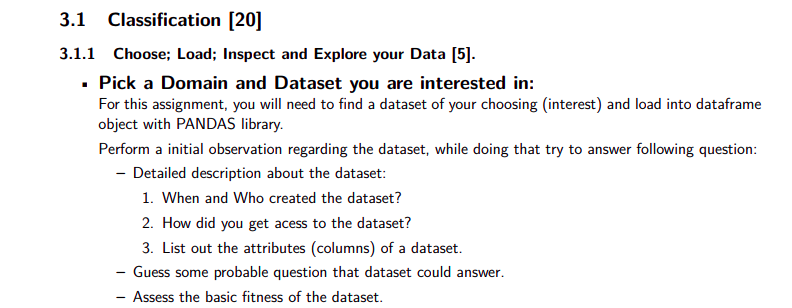

# About Dataset
1. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases.
It has almost all patients here are females at least 21 years old of Pima Indian heritage.

2. I get this data from shared drive form tutors.

3. The columns in this dataset are: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

In [105]:
# Location of the CSV file
logistic = ('/content/drive/MyDrive/FInal Datasets/Logistic/diabetes.csv')

df = pd.read_csv(logistic) # Reading CSV file

# Total size of the data frame:
Size_of_Frame = df.shape
size = df.size
print("Size of the data in the form of rows and columns is: ",Size_of_Frame)

# Total size of data:
print("Actual size of the dataframe is:", size)

# Priting first 5 data of dataset
df.head()

Size of the data in the form of rows and columns is:  (768, 9)
Actual size of the dataframe is: 6912


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

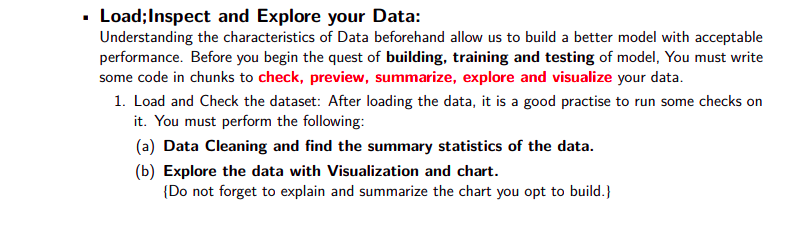

1. **We don't have any NULL data so we do not have to do the Data Cleaning Process**

2. **We have deleted duplicate data**

In [34]:
# Checking for NULL value
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [35]:
# Printing All columns and datatypes
print(f"\nData type of each variable are: \n\n{df.dtypes}")


Data type of each variable are: 

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [36]:
# Deleting duplicate data
df = df.drop_duplicates()

# Printing the dataset
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [37]:
# Printing first 5 data
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [106]:
# To see all the columns name
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

#Visual Diagrams

<Axes: xlabel='Outcome', ylabel='count'>

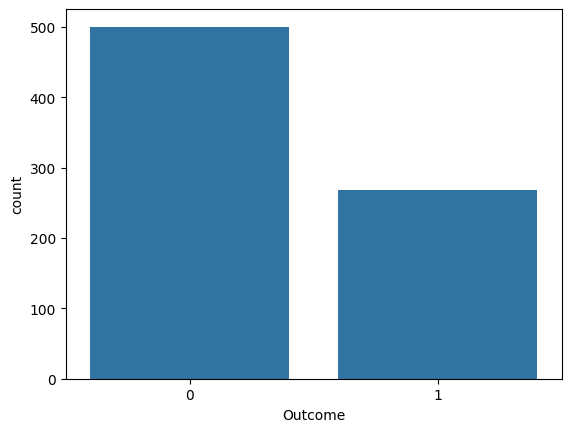

In [38]:
# Ploting Bar graph
sns.countplot(x='Outcome', data=df)

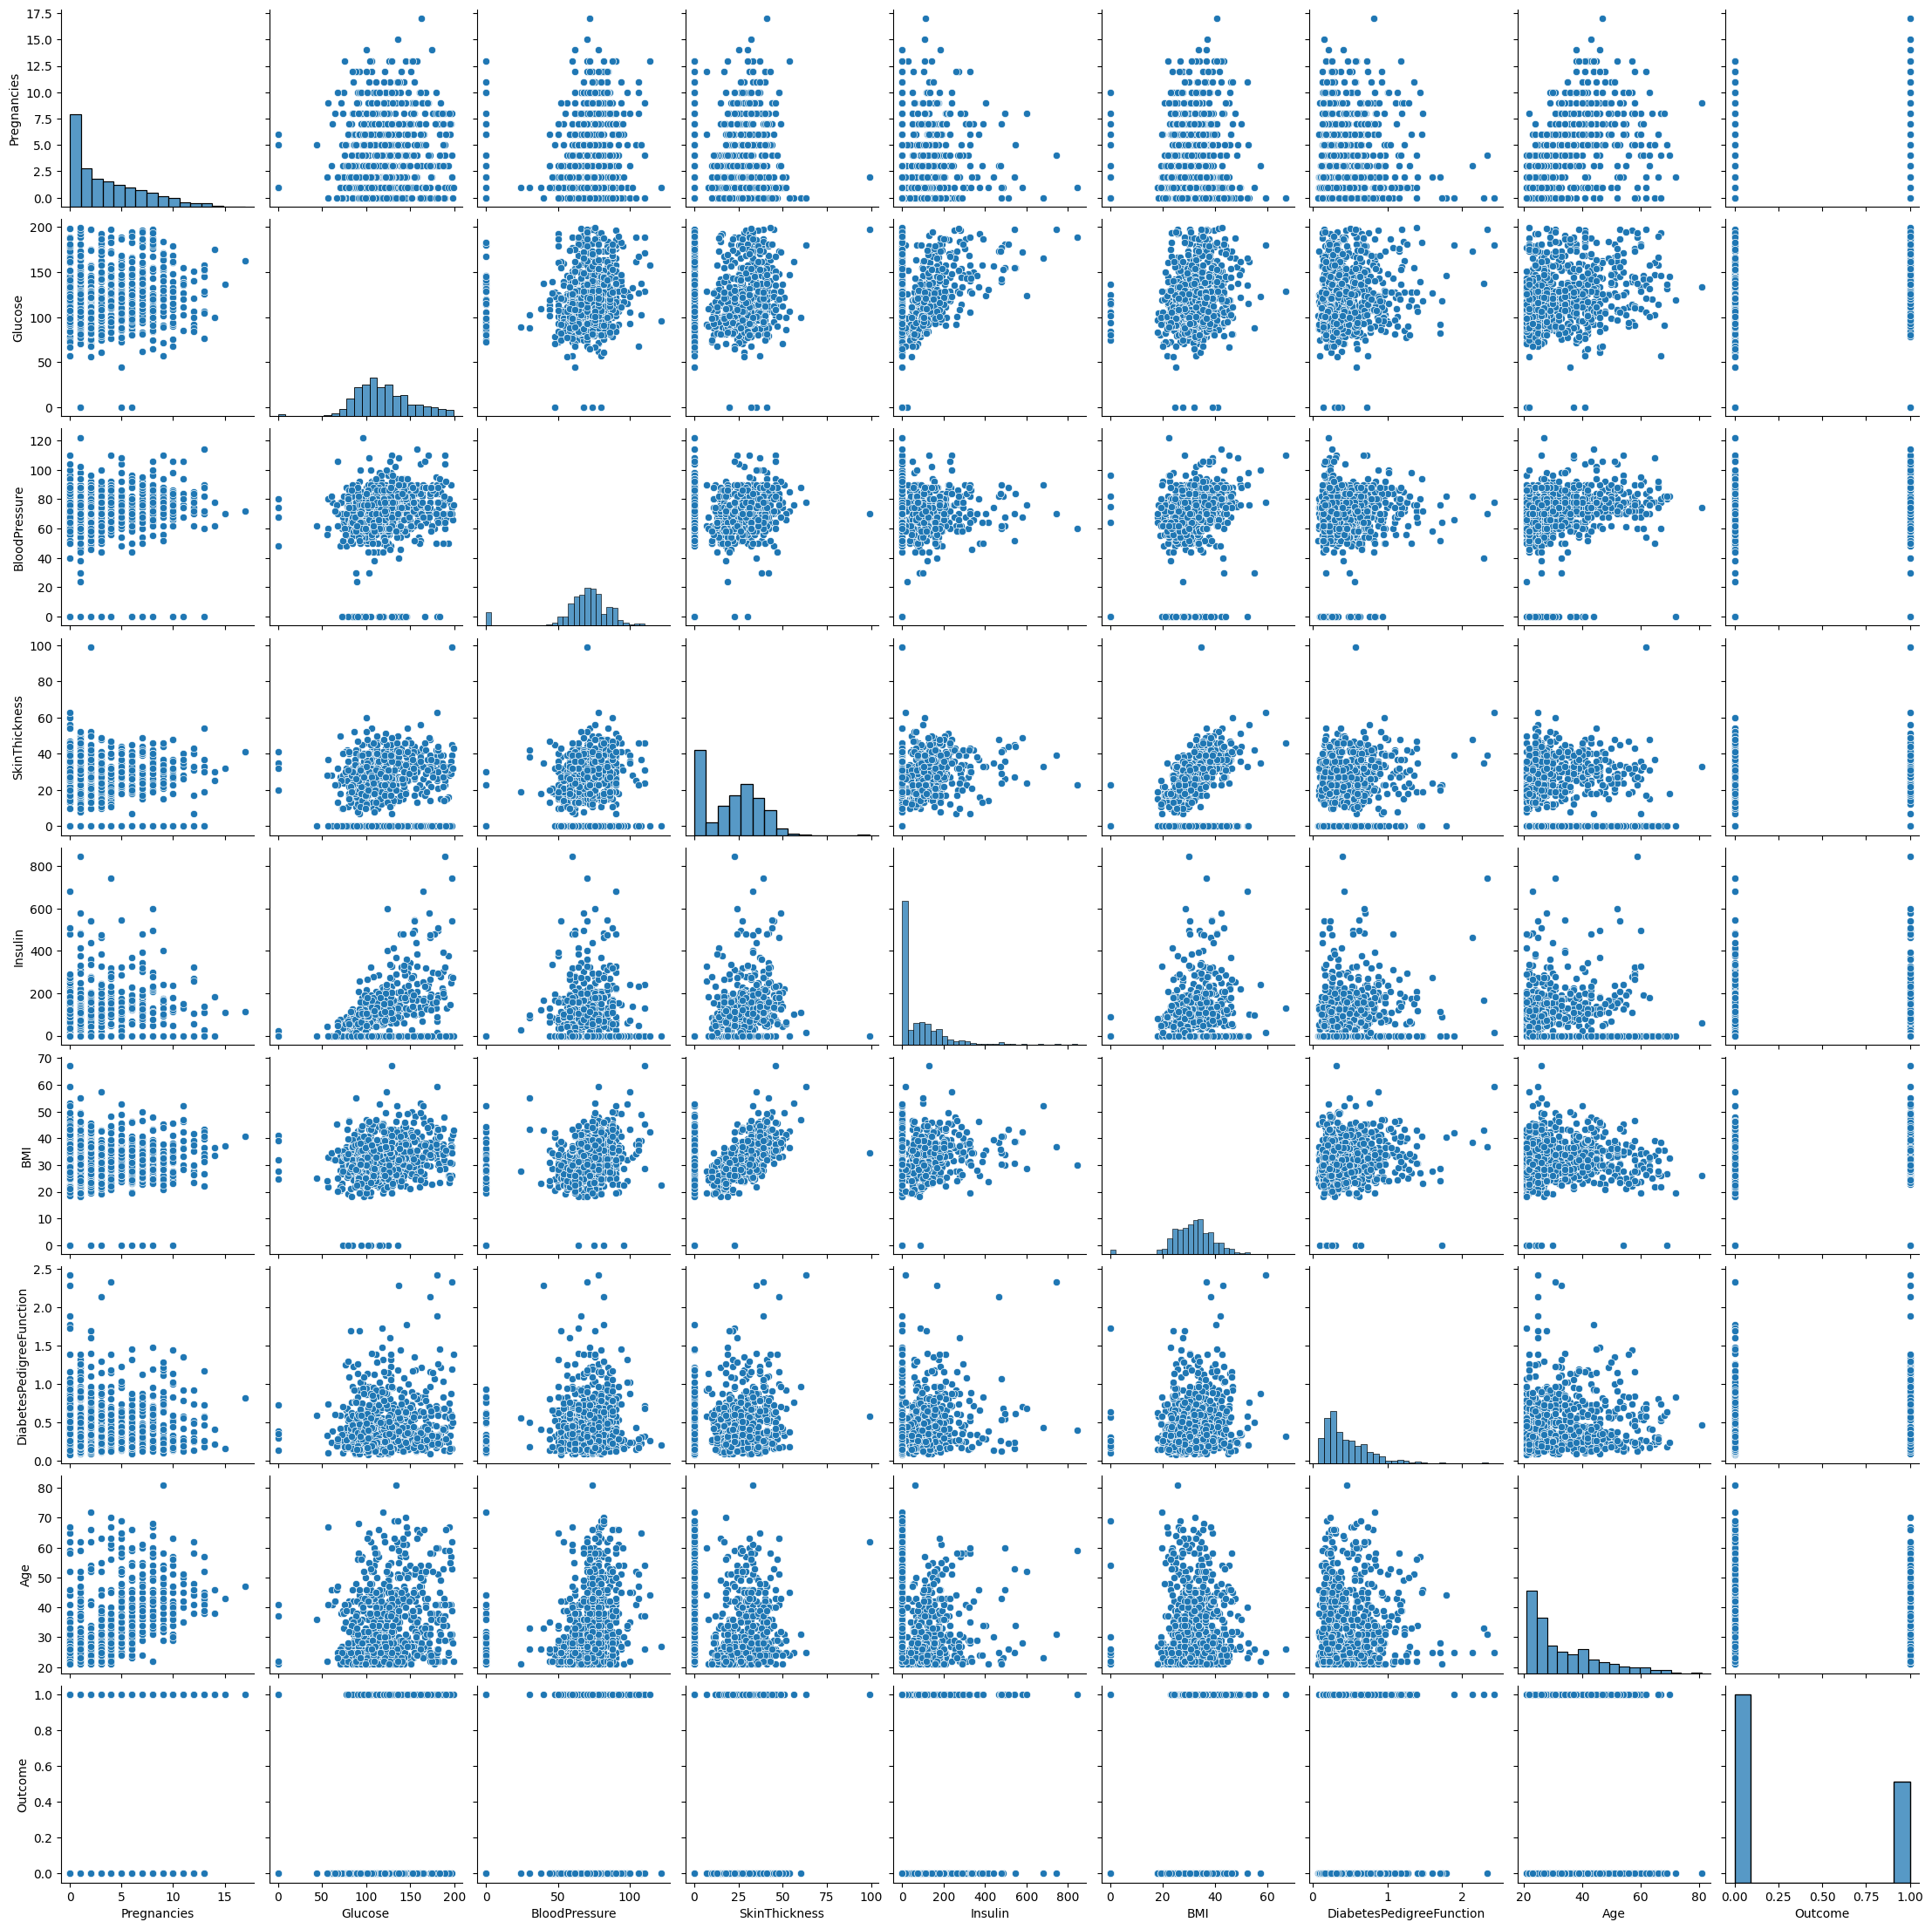

In [39]:
# Ploting scatter plot
sns.pairplot(df)
plt.show()

In [40]:
# Printing all the columns
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [41]:
# Printing first 5 data
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

# By Using Sklearn Logistic


In a logistic regression model, we're trying to understand how TV advertising (x) influences sales (y). We'll look at past data to find a relationship. The model estimates how much TV ads affect the chance of making a sale, helping us predict future sales based on TV ad spending.

In [42]:
# Split the dataset into features (X) and target variable (y)
X = df.drop('Outcome', axis=1)
Y = df['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [43]:
# Sanity Check:
if X.shape[0] == Y.shape[0]:
  print("Progress Further")
else:
  print("X and Y are not created correctly")

Progress Further


In [44]:
# Find unique values in the target variable Y
np.unique(Y)

array([0, 1])

In [45]:
# Sanity Check:
if X_train.shape[0] == y_train.shape[0]:
  print("Progress Further")
else:
  print("x_train and y_train are not created correctly")

Progress Further


# Biuld Model of Logistic Regression


In [46]:
# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [47]:
# Create logistic regression model
logistic_model = LogisticRegression()

# Fit the model on the training data
logistic_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [48]:
# Make predictions on the test set
y_test_pred = logistic_model.predict(X_test_scaled)

# Make predictions on the train set
y_train_pred = logistic_model.predict(X_train_scaled)

In [49]:
# Evaluate the model
accuracy_train = accuracy_score(y_train, y_train_pred)  # Calculate accuracy of model on training data
accuracy_test = accuracy_score(y_test, y_test_pred)  # Calculate accuracy of model on testing data

# Generate classification reports for both training and testing datasets
report_train = classification_report(y_train, y_train_pred)  # Generate classification report for training data
report_test = classification_report(y_test, y_test_pred)  # Generate classification report for testing data

# Print accuracy scores and classification reports
print(f'Training Accuracy: {accuracy_train}')  # Print training accuracy score
print(f'Testing Accuracy: {accuracy_test}')  # Print testing accuracy score
print('\nTraining Classification Report:\n', report_train)  # Print classification report for training data
print('\nTesting Classification Report:\n', report_test)  # Print classification report for testing data

Training Accuracy: 0.7703583061889251
Testing Accuracy: 0.7532467532467533

Training Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.88      0.83       401
           1       0.72      0.56      0.63       213

    accuracy                           0.77       614
   macro avg       0.75      0.72      0.73       614
weighted avg       0.76      0.77      0.76       614


Testing Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



## Hyper Parameter for logistic regression

This code snippet conducts a grid search to find the optimal combination of hyperparameters (C and penalty) for logistic regression. The 'C' parameter controls the regularization strength, while 'penalty' determines the type of regularization penalty. The grid search employs 5-fold cross-validation to evaluate each combination of hyperparameters. Once the grid search is fitted to the training data, it prints out the best hyperparameters discovered for logistic regression.



In [50]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l2']
}

# Instantiate logistic regression model
logistic_model = LogisticRegression(solver='lbfgs')
# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=logistic_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV to find the best hyperparameters
grid_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters
print("Best hyperparameters for Logistic Regression:")
print(grid_search.best_params_)


Best hyperparameters for Logistic Regression:
{'C': 10, 'penalty': 'l2'}


## Feature Selection

This code segment initializes Recursive Feature Elimination (RFE) with a logistic regression model that is set with specific hyperparameters (C=10, penalty='l2'). RFE is subsequently trained on the training data to identify the top 5 features. Upon completion, it outputs the names of the selected features. RFE methodically removes features that contribute less to the model's performance until it achieves the desired number of features.

In [51]:
# Initialize logistic regression model
logistic_model = LogisticRegression(C=10, penalty='l2')

# Initialize RFE
rfe = RFE(estimator=logistic_model, n_features_to_select=5)

# Fit RFE on the training data
rfe.fit(X_train_scaled, y_train)

# Get the selected features
selected_features = X_train.columns[rfe.support_]

print("Selected features using RFE:")
print(selected_features)


Selected features using RFE:
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'Age'], dtype='object')


## Final model for LogisticRegression

In this code, the dataset is filtered to include only the top features determined by Recursive Feature Elimination (RFE), which consist of 'Pregnancies', 'Glucose', 'BloodPressure', 'BMI', and 'Age'. Subsequently, the dataset is divided into training and testing subsets, and the features are standardized. A logistic regression model is then created with the optimized hyperparameters. Finally, the model is trained on the training data and utilized to predict outcomes for both the training and testing datasets.

In [52]:
from sklearn.metrics import accuracy_score, classification_report

# Define the best features selected using RFE
X = df.loc[:, ['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'Age']]
y = df['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create logistic regression model with best hyperparameters
logistic_model = LogisticRegression(C=10, penalty='l2')

# Fit the model on the training data
logistic_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_test_pred = logistic_model.predict(X_test_scaled)

# Make predictions on the train set
y_train_pred = logistic_model.predict(X_train_scaled)


The below codes computes the accuracy of the model on both the training and testing datasets using the accuracy_score function. Additionally, it generates classification reports using the classification_report function, which includes precision, recall, F1-score, and support for each class. Finally, it prints out the accuracy and classification reports for both the training and testing datasets.

In [53]:
# Evaluate the model
accuracy_train = accuracy_score(y_train, y_train_pred) # Calculate training accuracy
accuracy_test = accuracy_score(y_test, y_test_pred) # Calculate testing accuracy

report_train = classification_report(y_train, y_train_pred)
report_test = classification_report(y_test, y_test_pred)

print(f'Train Accuracy: {accuracy_train}')
print('\nTrain Classification Report:\n', report_train)

print(f'\nTest Accuracy: {accuracy_test}') # Print testing accuracy
print('\nTest Classification Report:\n', report_test) # Print classification report for testing data

Train Accuracy: 0.7703583061889251

Train Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.88      0.83       401
           1       0.71      0.57      0.63       213

    accuracy                           0.77       614
   macro avg       0.75      0.72      0.73       614
weighted avg       0.76      0.77      0.76       614


Test Accuracy: 0.7142857142857143

Test Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.76      0.77        99
           1       0.59      0.64      0.61        55

    accuracy                           0.71       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.72      0.71      0.72       154



##Decision Tree

This code builds a Decision Tree Classifier model using scikit-learn's DecisionTreeClassifier, trains it on the training data, and then generates predictions for the test set. The predictions (y_pred_tree) contain the class labels predicted by the model for the test data.


In [54]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree Classifier model
tree_model = DecisionTreeClassifier()

# Train the model
tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_tree = tree_model.predict(X_test)

#Priting Tree
y_pred_tree

array([1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_tree)

array([[76, 23],
       [21, 34]])

In [55]:
# Evaluate the model
#The code calculates the accuracy of a decision tree classifier and generates a classification report summarizing its performance on the test data
accuracy_tree = accuracy_score(y_test, y_pred_tree)
report_tree = classification_report(y_test, y_pred_tree)

print(f'Accuracy (Decision Tree): {accuracy_tree}')
print('\nClassification Report (Decision Tree):\n', report_tree)

Accuracy (Decision Tree): 0.7012987012987013

Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       0.77      0.76      0.77        99
           1       0.58      0.60      0.59        55

    accuracy                           0.70       154
   macro avg       0.68      0.68      0.68       154
weighted avg       0.70      0.70      0.70       154



In [56]:
# testing accuracy for test data
tree_model.score(X_test, y_test)

0.7012987012987013

## Hyper-parameter Tuning


In [57]:
from sklearn.model_selection import GridSearchCV

# Initialize the DecisionTreeClassifier with a specific random state
clf = DecisionTreeClassifier(random_state=42)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [60]:
# Define hyperparameter grid for GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [61]:
# Print the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:")
print(best_params)

# Get the best estimator (model) from GridSearchCV
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Best Hyperparameters:
{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10}
Accuracy: 0.7337662337662337


In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create Decision Tree Classifier model with best hyperparameters
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_leaf=2, min_samples_split=5)

# Train the model
tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_tree = tree_model.predict(X_test)

# Evaluate the model
accuracy_tree = accuracy_score(y_test, y_pred_tree)
report_tree = classification_report(y_test, y_pred_tree)

print(f'Accuracy (Decision Tree): {accuracy_tree}')
print('\nClassification Report (Decision Tree):\n', report_tree)


Accuracy (Decision Tree): 0.7207792207792207

Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       0.78      0.79      0.78        99
           1       0.61      0.60      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.69      0.69       154
weighted avg       0.72      0.72      0.72       154



In [63]:
# Initialize Decision Tree Classifier model
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_leaf=2, min_samples_split=5)

# Initialize RFE
rfe_tree = RFE(estimator=tree_model, n_features_to_select=5)

# Fit RFE on the training data
rfe_tree.fit(X_train, y_train)

# Get the selected features
selected_features_tree = X_train.columns[rfe_tree.support_]

print("Selected features using RFE for Decision Tree Classifier:")
print(selected_features_tree)


Selected features using RFE for Decision Tree Classifier:
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'Age'], dtype='object')


# Final Module for DecisionTreeClassifiers

In [64]:
X_selected = X.loc[:, ['Glucose', 'BloodPressure', 'BMI', 'Age']]
y = df['Outcome']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create Decision Tree Classifier model
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_leaf=2, min_samples_split=5)

# Train the model
tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_tree = tree_model.predict(X_test)

# Evaluate the model
accuracy_tree = accuracy_score(y_test, y_pred_tree)
report_tree = classification_report(y_test, y_pred_tree)

print(f'Accuracy (Decision Tree): {accuracy_tree}')
print('\nClassification Report (Decision Tree):\n', report_tree)

Accuracy (Decision Tree): 0.6818181818181818

Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       0.72      0.82      0.77        99
           1       0.57      0.44      0.49        55

    accuracy                           0.68       154
   macro avg       0.65      0.63      0.63       154
weighted avg       0.67      0.68      0.67       154



## Linear Regression

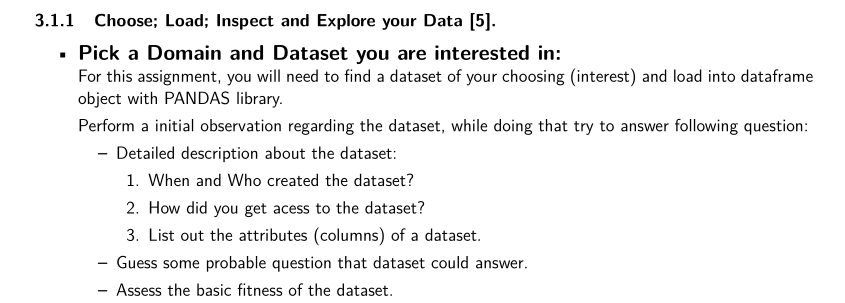

#ANSWER

1. The dataset of Startups is created by Micheal shen.
2. I get this data from shared drive form tutors.

3. The columns name are: ['TV', 'Radio', 'Newspaper', 'Sales']

This dataset can answer flooowing questions:

1. How many advertising do TV make?
2. How many advertising do Radio makes?

# Uploading CSV file and checking its size

In [66]:
# Location of Drive for accessing csv file
regression = ('/content/drive/MyDrive/FInal Datasets/Linear/advertising.csv')

# Reading csv file
df = pd.read_csv(regression)

# Size of SIze of data
Size_of_Frame = df.shape
size = df.size
print("Size of the data in the form of rows and columns is: ",Size_of_Frame)

# Printing the actual size of data
print("Actual size of the dataframe is:", size)
df.head()

Size of the data in the form of rows and columns is:  (200, 4)
Actual size of the dataframe is: 800


TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9

# Total number of Columns and its name

In [67]:
# Printing the columns in dataset
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

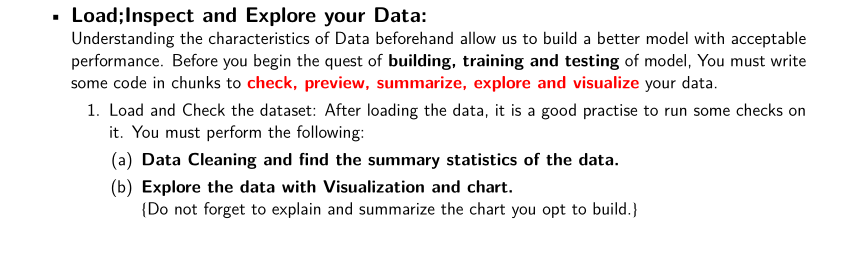

# Checking for NULL data

In [68]:
# Checking for NULL data
df.isnull().sum()

TV           1
Radio        0
Newspaper    0
Sales        0
dtype: int64

# Checking the datatypes of our Rows

In [69]:
# Checking datatypes of each columns
data_types = df.dtypes
print(data_types)

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object


# Filling NULL data with mean of the other data in that same column

In [70]:
# Filling NULL value
num_value = df.select_dtypes(include=["float64"]).columns
df[num_value] = df[num_value].fillna(df[num_value].mean())

# Checking For NULL data Again

In [71]:
# Checking NULL value
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# Deleting the duplicat data and printing the data

In [72]:
# Deleting duplicates data
df = df.drop_duplicates()

# Printing data of dataset
df

TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]

# Data Visualization

In [73]:
# Priting first 5 data
df.head()

TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9

# Creating Histogram

In [100]:
# Using Describe
df.describe()

TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.744724   23.264000   30.554000   15.130500
std     85.277936   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     75.000000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000

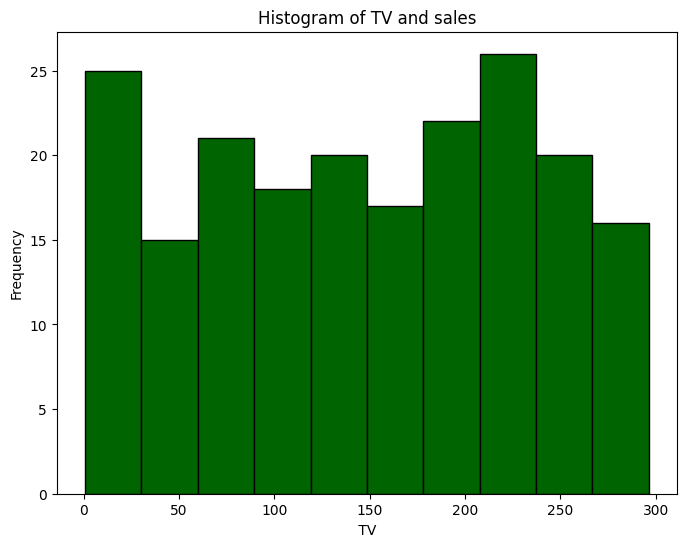

In [74]:
# Ploting Histogram
plt.figure(figsize=(8, 6))
plt.hist(df['TV'], bins=10, color='darkgreen', edgecolor='black')
plt.title('Histogram of TV and sales')
plt.xlabel(' TV ')
plt.ylabel('Frequency')
plt.show()

# Create Scatter Plot

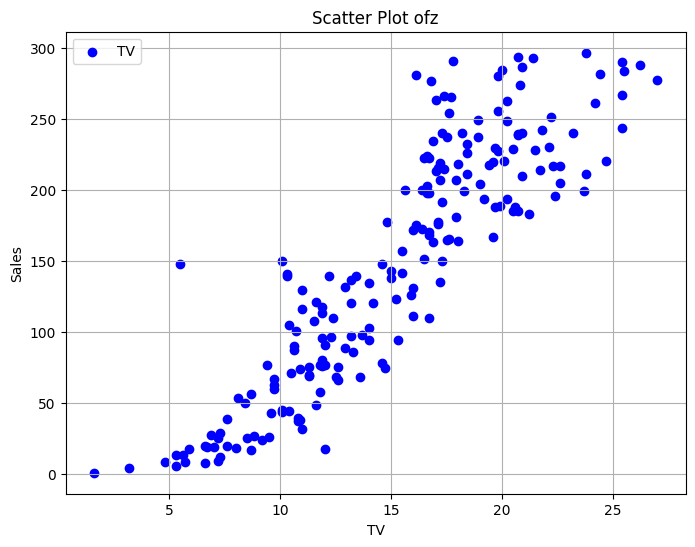

In [75]:
# Ploting scatter plot
plt.figure(figsize=(8, 6))
plt.scatter( df['Sales'],df['TV'], color='blue', label='TV')
plt.title('Scatter Plot ofz')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.grid(True)
plt.legend()
plt.show()

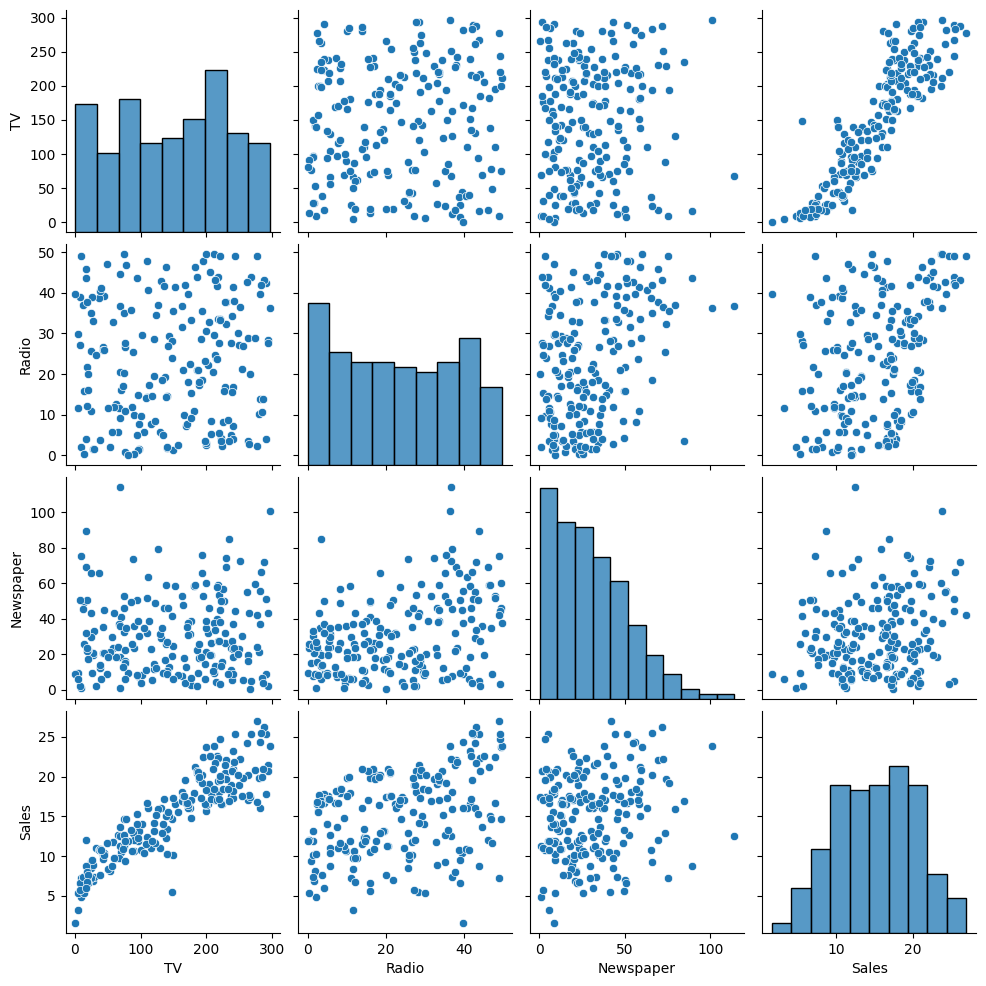

In [76]:
# Ploting scatter plot
sns.pairplot(df)
plt.show()

# Declearing x and y where x is predictor and y is target

In [77]:
# Extract 'TV' column from DataFrame 'df' and convert it to a NumPy array
x = df['TV'].to_numpy()

# Extract 'Sales' column from DataFrame 'df' and convert it to a NumPy array
y = df['Sales'].to_numpy()

# Sanity Check

In [78]:
# sanity check
if x.shape == y.shape:
  print("Ok proceed")
else:
  print("Not same columns or rows")

Ok proceed


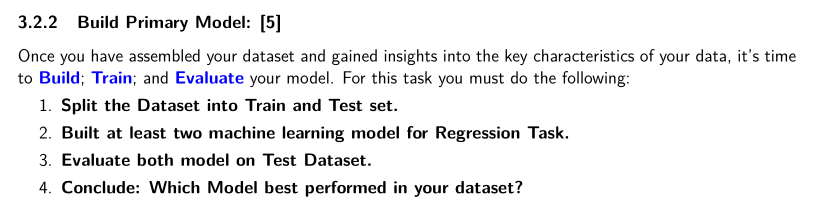

We've split our dataset into training and testing sets using train_test_split from sklearn.model_selection, allowing us to train our model (X_train, y_train) and evaluate its performance (X_test, y_test).

In [79]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df[['TV']], df['Sales'], test_size=0.2, random_state=42)

For our regression task, we've deployed two machine learning models:

1. Linear Regression
2. Random Forest Regression

#1. Linear Regresssion
We use a Linear Regression model to guess how much TV make changes in advertise. We split the data into training and testing sets, train the model on the training data, and then check how well it does by comparing its predictions with the actual advertise in the test set. We measure this using the mean squared error, which tells us how close the model's guesses are to the real number.

In [80]:
# Building linear regression model

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [81]:
# Predicting using linear regression model
linear_model_predictions = linear_model.predict(X_test)

# Calculating mean squared error for linear regression model
linear_model_mse = mean_squared_error(y_test, linear_model_predictions)

# Printing the mean squared error for linear regression model
print("Model 1 - Linear Regression")
print("Mean Squared Error:", linear_model_mse)
print("\n")

# Calculate R-squared for linear regression model
linear_model_r2 = r2_score(y_test, linear_model_predictions)
print("R-squared:", linear_model_r2)
print("\n")

Model 1 - Linear Regression
Mean Squared Error: 8.364061005010567


R-squared: 0.729328049648376




# Model 2 Random Forest Regression

We're using a Random Forest Regression model to predict the advertise based on their show in TV. After loading and splitting the dataset, we train the Random Forest model on the training data and assess its performance on the test data using the mean squared error. By comparing the MSE values from both models, we'll determine which one offers better accuracy in predicting advertised numbers difference.

In [82]:
# Building random forest regression model
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train, y_train)

RandomForestRegressor()

In [83]:
# Predicting using random forest regression model
random_forest_model_predictions = random_forest_model.predict(X_test)

# Calculating mean squared error for random forest regression model
random_forest_model_mse = mean_squared_error(y_test, random_forest_model_predictions)

# Printing the mean squared error for random forest regression model
print("Model 2: \nRandom Forest Regression")
print("Mean Squared Error:", random_forest_model_mse)
print("\n")

# Calculate R-squared for random forest regression model
random_forest_model_r2 = r2_score(y_test, random_forest_model_predictions)
print("R-squared:", random_forest_model_r2)

Model 2: 
Random Forest Regression
Mean Squared Error: 7.403915262291656


R-squared: 0.7603996212985409


## Evaluate both model on Test Dataset

This code assesses the prediction performance of the Random Forest model by computing the mean squared error (MSE) and R-squared values for both the training and testing datasets. This evaluation helps gauge how effectively the model captures the data's patterns and extends to new, unseen data, offering insights into its predictive precision.

In [87]:
# Evaluating the Linear Regression Model
print("Evaluation of Linear Regression Model:")
print("Mean Squared Error (MSE) for Linear Regression:", linear_model_mse)
print("\n")

# Evaluating the Random Forest Regression Model
print("Evaluation of Random Forest Regression Model:")
print("Mean Squared Error (MSE) for Random Forest Regression:", random_forest_model_mse)
print("\n")

# Evaluate both models on Test Dataset
linear_model_mse = mean_squared_error(y_test, linear_model_predictions)
random_forest_model_mse = mean_squared_error(y_test, random_forest_model_predictions)

# Evaluate both models on Test Dataset
linear_model_r2 = r2_score(y_test, linear_model_predictions)
random_forest_model_r2 = r2_score(y_test, random_forest_model_predictions)

print("R-squared (Linear Regression):", linear_model_r2)
print("R-squared (Random Forest Regression):", random_forest_model_r2)
print("\n")


Evaluation of Linear Regression Model:
Mean Squared Error (MSE) for Linear Regression: 8.364061005010567


Evaluation of Random Forest Regression Model:
Mean Squared Error (MSE) for Random Forest Regression: 7.403915262291656


R-squared (Linear Regression): 0.729328049648376
R-squared (Random Forest Regression): 0.7603996212985409




## Evaluate both model on Test Dataset

In [88]:
# Conclusion based on MSE comparison for Sales prediction
if linear_model_mse < random_forest_model_mse:
    print("Linear Regression Model performed better for predicting Sales based on MSE.")
else:
    print("Random Forest Regression Model performed better for predicting Sales based on MSE.")

# Conclude: Which Model best performed in your dataset based on R-squared
if linear_model_r2 > random_forest_model_r2:
    print("Linear Regression model performed better for predicting Sales based on R-squared.")
elif linear_model_r2 < random_forest_model_r2:
    print("Random Forest Regression model performed better for predicting Sales based on R-squared.")
else:
    print("Both models performed equally for predicting Sales based on R-squared.")

Random Forest Regression Model performed better for predicting Sales based on MSE.
Random Forest Regression model performed better for predicting Sales based on R-squared.


## Hyper-parameter Optimization with Cross-Validation

In [89]:
from sklearn.preprocessing import LabelEncoder

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(RandomForestRegressor(),
                                   param_distributions=param_grid,
                                   n_iter=50,
                                   cv=5,
                                   scoring='neg_mean_squared_error',
                                   n_jobs=-1,
                                   random_state=42)

# Fit the randomized search
random_search.fit(X_train, y_train)

# Get the best parameters and model
best_params_rf = random_search.best_params_
best_model_rf = random_search.best_estimator_

# Evaluate the best model on test data
Y_pred = best_model_rf.predict(X_test)
mse = mean_squared_error(y_test, Y_pred)
r2 = r2_score(y_test, Y_pred)

# Print results
print("Best Hyperparameters:")
print(best_params_rf)
print("\nBest Model:")
print(best_model_rf)
print("\nPerformance Metrics:")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Best Hyperparameters:
{'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 10, 'bootstrap': True}

Best Model:
RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                      n_estimators=200)

Performance Metrics:
Mean Squared Error: 7.411029905665839
R-squared: 0.7601693821363693


In [91]:
# Printing first 5 data
df.head()

TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9

In [92]:
# Priting Columns
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [93]:
# Best Features
selected_features_indices = [0, 3]

selected_features_names = df.columns[ selected_features_indices ]

print("Selected Features Column Names:", selected_features_names)

Selected Features Column Names: Index(['TV', 'Sales'], dtype='object')


In [94]:
# Priting the selective feature
selected_features_names

Index(['TV', 'Sales'], dtype='object')

In [95]:
rf = RandomForestRegressor(max_depth=5, random_state = 42)

# Fit the model to the training data
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, random_state=42)

In [96]:
# Predictions on the training set using the Random Forest Regressor model
y_rf_train_pred= rf.predict(X_train)

# Predictions on the testing set using the Random Forest Regressor model
y_rf_test_pred = rf.predict(X_test)

##Evaluate Module Prediction

In [97]:
# Calculate MSE for training and testing data
rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)

# Calculate RMSE by taking the square root of MSE
rf_train_rmse = np.sqrt(rf_train_mse)
rf_test_rmse = np.sqrt(rf_test_mse)

# R-squared values
rf_train_r2 = r2_score(y_train, y_rf_train_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

print("Train RMSE:", rf_train_rmse)
print("Test RMSE:", rf_test_rmse, "\n")
print("Train R-squared:", rf_train_r2)
print("Test R-squared:", rf_test_r2)

Train RMSE: 1.6592942317477617
Test RMSE: 2.6785424434961325 

Train R-squared: 0.8972641194937345
Test R-squared: 0.7678208988802913


In [98]:
# Create a DataFrame to store the results of the Random Forest model
rf_results = pd.DataFrame(['Random Forest', rf_train_rmse, rf_test_rmse, rf_train_r2, rf_test_r2]).transpose()

# Rename the columns of the DataFrame
rf_results.columns = ['Method', 'Training RMSE', 'Testing RMSE', 'Training R^2', 'Testing R^2']

# Display the results
rf_results

Method Training RMSE Testing RMSE Training R^2 Testing R^2
0  Random Forest      1.659294     2.678542     0.897264    0.767821

## Conclusion
In conclusion, this assignment compared Linear Regression and Random Forest Regression models for predicting startup profit based on Marketing Spend. While Linear Regression offered a foundational insight, Random Forest Regression, optimized with hyperparameters, demonstrated superior accuracy. This highlights the necessity of advanced techniques for complex datasets. Future efforts may focus on integrating additional features and exploring other advanced regression methods for improved predictive performance in startup contexts. Overall, this assignment emphasizes the importance of hyperparameter optimization in maximizing model performance and underscores the effectiveness of ensemble methods in practical predictive modeling scenarios.